## Decision tree

This is my first exercise inspered by [this course](https://agorapulse.udemy.com/data-science-and-machine-learning-with-python-hands-on/learn/v4/)

In [70]:
import numpy as np
import pandas as pd
from sklearn import tree

input_file = "/Users/fede/development/data-science/titanic/train.csv"
df = pd.read_csv(input_file, header = 0)

In [63]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,...,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund...,male,...,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cuming...,female,...,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikki...,female,...,0,STON/O...,7.9250,NaN,S
3,4,1,1,Futrel...,female,...,0,113803,53.1000,C123,S
4,5,0,3,"Allen,...",male,...,0,373450,8.0500,NaN,S


# Mapping values

In [64]:
d = {'male': 1, 'female': 0}
df['Sex'] = df['Sex'].map(d)
#(C=Cherbourg, Q=Queenstown, S=Southampton)
c = {'C': 0,'Q':1,'S':2}
df['Embarked'] = df['Embarked'].map(c)

# Remove unnecessary values

In [65]:
df = df.drop('Name', 1)
df = df.drop('Ticket', 1)
df = df.drop('Cabin', 1)
df = df.drop('PassengerId', 1)

In [66]:
df = df[['Pclass', 'Sex', 'Age','SibSp','Parch','Fare', 'Survived']]

df.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,1,22.0,1,0,7.2500,0
1,1,0,38.0,1,0,71.2833,1
2,3,0,26.0,0,0,7.9250,1
3,1,0,35.0,1,0,53.1000,1
4,3,1,35.0,0,0,8.0500,0
5,3,1,NaN,0,0,8.4583,0
6,1,1,54.0,0,0,51.8625,0
7,3,1,2.0,3,1,21.0750,0
8,3,0,27.0,0,2,11.1333,1
9,2,0,14.0,1,0,30.0708,1


In [67]:
features = list(df.columns[:6])
features

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']

In [68]:
df1 = df.astype(object).replace(np.nan, '-1')

y = df1["Survived"]
X = df1[features]

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,y)


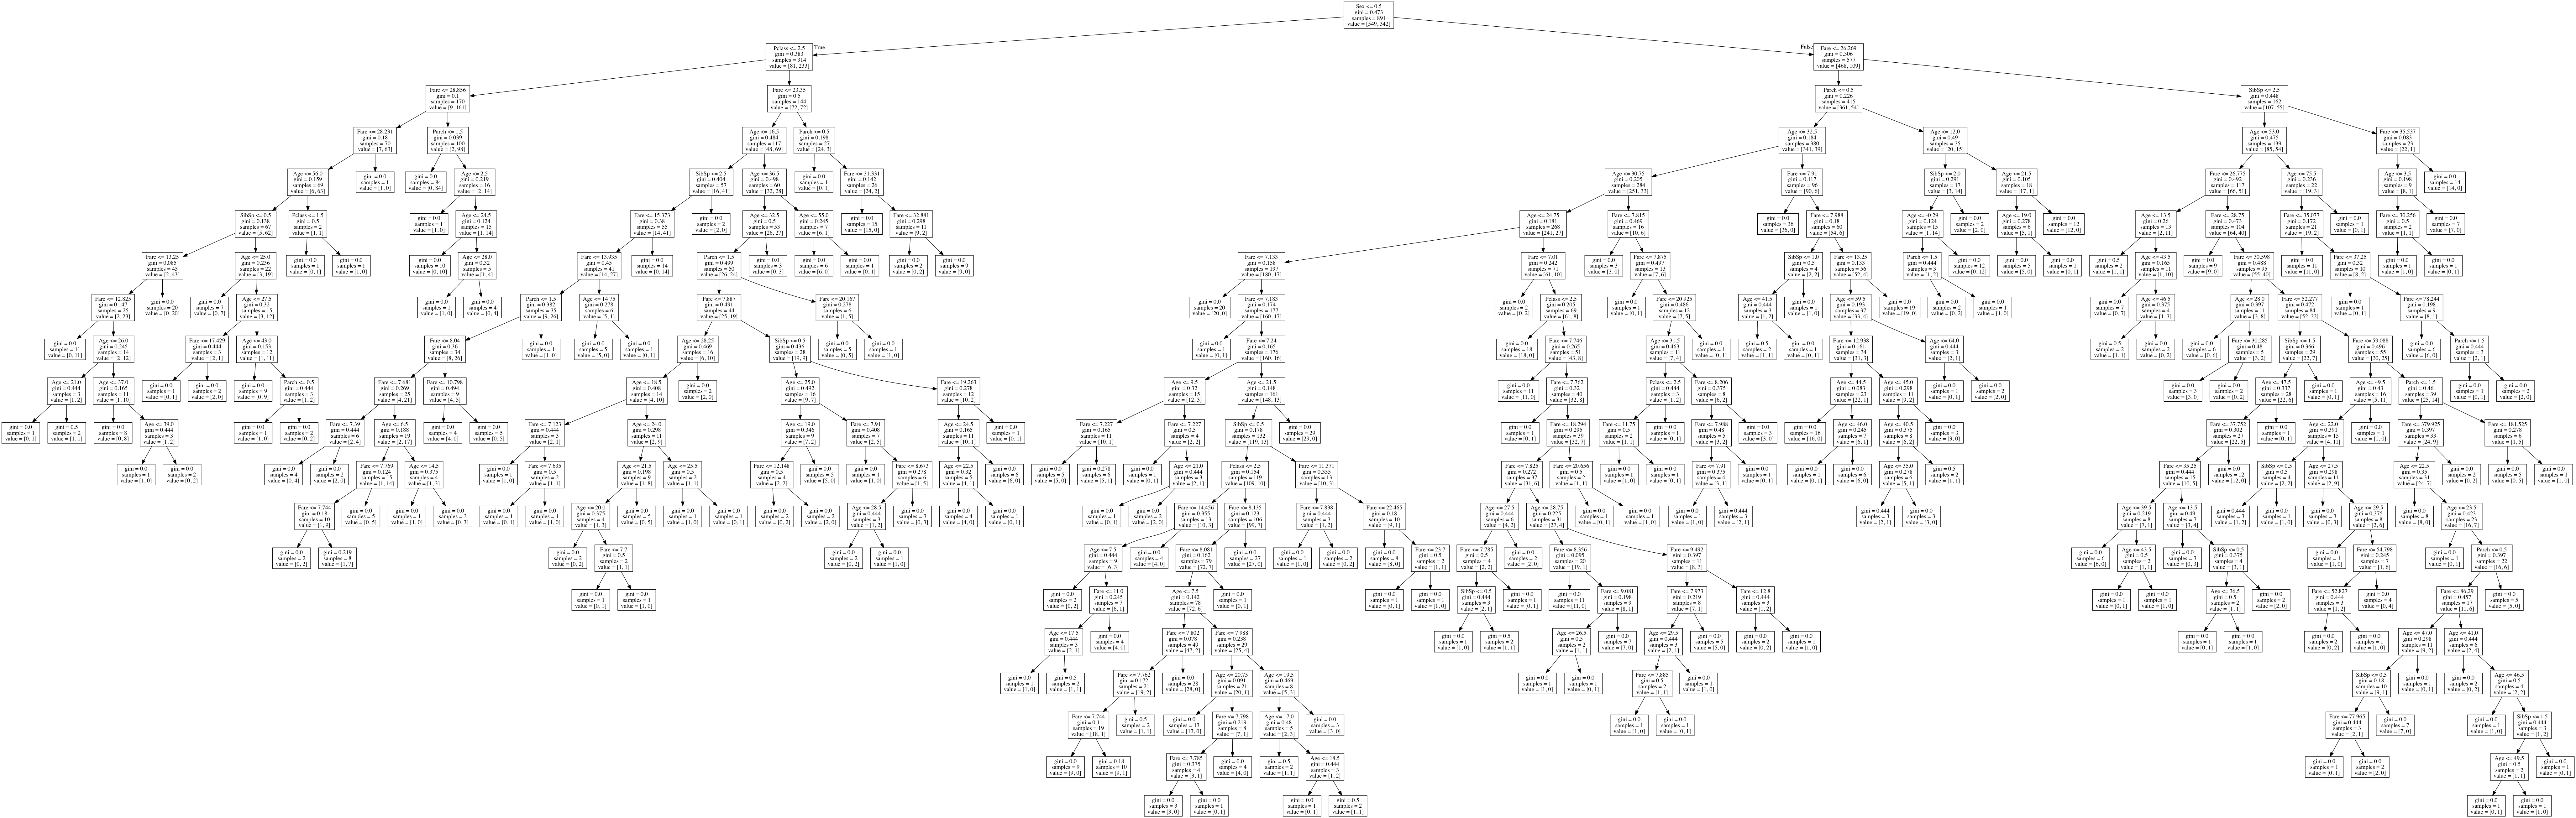

In [69]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
import pydotplus

dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=features)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())